<a href="https://colab.research.google.com/github/mayanknagar97/credit-card-project/blob/main/Credit_Card_fraud_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection using logistic Regression**

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Exploratory Data Analysis


loading data to a Pandas Dataframe

In [ ]:
creditcard_data = pd.read_csv('/content/creditcard.csv')


Understanding the Data

In [ ]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,0.985152,-2.408867,1.373587,1.763579,0.285327,0.945527,-0.250914,0.534074,0.341867,-0.093459,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,0.253297,-2.169046,2.724520,0.955362,0.338823,0.659885,0.381967,0.159690,-0.090632,-0.051795,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,1.133246,-1.689502,2.537282,1.566142,0.200226,0.148113,0.391597,-0.454222,-0.449532,-0.107163,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,-0.342078,1.228923,-2.422949,1.080143,1.809726,0.014903,1.083481,-0.313433,0.824736,0.492718,-0.108758,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Information

In [ ]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [ ]:
creditcard_data.shape

(9965, 31)

In [ ]:
creditcard_data.describe

<bound method NDFrame.describe of        Time        V1        V2        V3  ...       V27       V28  Amount  Class
0         0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1         0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2         1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3         1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4         2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0
...     ...       ...       ...       ...  ...       ...       ...     ...    ...
9960  14837  1.286884 -0.124610  0.148283  ... -0.084116 -0.022744   12.18    0.0
9961  14854  1.318742  0.496408  0.114876  ... -0.046154  0.017304    1.78    0.0
9962  14857  1.241757  0.419587  0.806183  ... -0.051084  0.017208    1.29    0.0
9963  14861  1.304800 -0.052885  0.415235  ... -0.099851 -0.015404    4.72    0.0
9964  14864 -1.747939  3.712444       NaN  ...       NaN       N

Handling Missing values

In [ ]:
# Cheking percent of missing values in columns
creditcard_data_missing_columns = (round(((creditcard_data.isnull().sum()/len(creditcard_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
creditcard_data_missing_columns

,null
V15,0.01
V16,0.01
Amount,0.01
V28,0.01
V27,0.01
V26,0.01
V25,0.01
V24,0.01
V23,0.01
V22,0.01


There is some missing data in the dataset, therefore  performing some method to deal with missing data 

In [ ]:
# drop all rows containing null
creditcard_data.dropna()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,14834,1.180311,-0.268826,1.373170,-0.623739,-1.237326,-0.495057,-0.909022,-0.000706,2.961146,-1.437185,1.307043,-1.435148,2.303324,1.272459,1.670639,-0.395817,0.579965,0.391157,-0.568806,-0.146870,0.170907,0.974244,-0.036893,0.383235,0.369188,-0.581899,0.098968,0.035401,2.00,0.0
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,0.985152,-2.408867,1.373587,1.763579,0.285327,0.945527,-0.250914,0.534074,0.341867,-0.093459,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,0.253297,-2.169046,2.724520,0.955362,0.338823,0.659885,0.381967,0.159690,-0.090632,-0.051795,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,1.133246,-1.689502,2.537282,1.566142,0.200226,0.148113,0.391597,-0.454222,-0.449532,-0.107163,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0


from the data it can be observed that there is no missing value in any of the column.

Distribution of Legit and fraud Transactiions


In [ ]:
Classes = creditcard_data['Class'].value_counts()
Classes


0.0    9926
1.0      38
Name: Class, dtype: int64

In [ ]:
legit_share = round((Classes[0]/creditcard_data['Class'].count()*100),2)
legit_share

99.62

In [ ]:
fraud_share = round((Classes[1]/creditcard_data['Class'].count()*100),2)
fraud_share

0.38

Only 0.38% fraud cases therefore we have to take care of class imbalance.

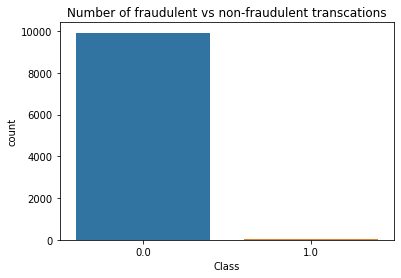

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data = creditcard_data )
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

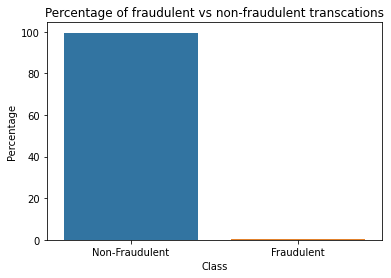

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[legit_share, fraud_share]} 
creditcard_data_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=creditcard_data_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

Seperating Data for Analysis

In [ ]:
legit = creditcard_data[creditcard_data.Class == 0]
print(legit.shape)


(9926, 31)


In [ ]:
fraud = creditcard_data[creditcard_data['Class'] == 1]
print(fraud.shape)

(38, 31)


Statistical measure of data

In [ ]:
legit.Amount.describe()



count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()



count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

Distribution Plot

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Analysis**


We do not see any specific pattern for the fraudulent and legit transctions with respect to Time. Hence, we can drop the Time column.



Observe the distribution of classes with Amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


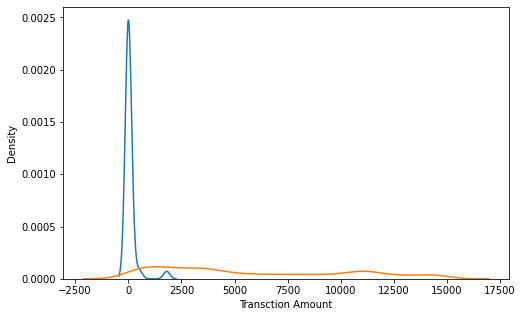

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


**Analysis**


We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

Comparing the values for both transaction.

In [ ]:
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,5921.607697,-0.235577,0.266833,0.934388,0.239735,-0.041743,0.140925,-0.057661,-0.069971,0.813003,-0.198659,0.744289,-1.235943,0.850165,0.738842,-0.127278,0.008677,0.341282,-0.010333,-0.069995,0.026103,-0.055139,-0.152043,-0.033460,0.023142,0.087567,0.107554,0.003624,0.001701,62.919501
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,-6.319996,6.389743,-9.955713,0.399640,-9.686695,-0.265487,-4.447208,-6.054725,-1.684315,0.126903,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


 


**Under sampling**

build a sample data set containing similar distribution of legit and fraudulent transaction

In [ ]:
legit_sample = legit.sample(n=38)

concatinating two dataframes

In [ ]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9172,13096,1.300639,-0.609711,0.707997,-0.397516,-1.255619,-0.922382,-0.740125,-0.219463,0.721224,0.245675,0.574766,-3.513451,1.067472,1.374565,0.231335,1.280618,0.962212,-0.940505,0.260114,0.088164,-0.021450,-0.059160,-0.007323,0.323998,0.293055,-0.324737,-0.026145,0.022639,63.00,0.0
8394,11238,-0.770135,0.728582,2.332205,1.657901,-0.270098,0.866474,0.055864,0.252946,2.002989,-0.763483,-0.206983,-1.709441,1.675377,0.514149,-2.325207,-1.571418,1.726535,-0.863038,0.769520,0.017156,-0.491580,-0.560827,0.105411,0.028860,-0.291664,-0.517132,0.336304,0.197743,34.49,0.0
1556,1221,-0.510937,-0.848016,0.744595,-1.653409,-0.060183,-0.020630,-0.243400,0.199897,-0.525795,0.260267,-0.419534,-1.080718,-1.538955,-0.275872,-1.509749,1.544426,-0.263474,-0.638035,0.981239,-0.034710,-0.029935,-0.275043,0.046758,-0.891883,-0.005773,-0.489827,-0.155354,0.022743,79.00,0.0
360,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,-0.122023,1.332971,0.241547,-0.960825,0.526003,0.229368,0.377200,-0.520008,0.186336,0.230867,0.062757,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0.0
1482,1158,1.150559,0.217028,0.503593,1.066363,-0.461525,-0.745174,0.041322,-0.021768,-0.132318,0.175510,1.383222,0.544142,-0.989829,0.754240,0.315134,0.308993,-0.560494,0.206396,-0.063033,-0.167924,-0.111975,-0.421642,0.057032,0.475331,0.380089,-0.580347,0.007138,0.018426,17.79,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,11.669205,-17.228662,0.055572,-18.493773,-0.304172,-10.629497,-14.441211,-5.105486,1.270226,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.0,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,10.446847,-15.479052,0.734442,-13.883779,0.821440,-11.911483,-18.103004,-6.837835,3.126929,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.0,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,11.228470,-17.131301,-0.169401,-18.049998,-1.366236,-9.723565,-14.744902,-5.247301,-0.574675,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,11.277921,-16.728339,0.241368,-17.721638,-0.387300,-10.322017,-13.959085,-5.030710,1.197266,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.0,1.0
9509,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,11.152491,-16.558197,0.302645,-17.475921,-0.412393,-10.222203,-13.799148,-5.008585,1.162026,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.0,1.0


In [ ]:
new_dataset['Class'].value_counts()

1.0    38
0.0    38
Name: Class, dtype: int64

Now our data set is balanced.

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,5421.500000,0.142871,-0.027578,0.871484,-0.060222,-0.119927,-0.065928,-0.089123,-0.029916,0.752250,-0.114728,0.751319,-1.449940,0.927836,0.871374,0.002401,-0.009425,0.362439,-0.120166,0.264469,0.002783,-0.127533,-0.082318,-0.037171,-0.042501,0.141260,0.059605,-0.077738,0.012906,47.658421
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,-6.319996,6.389743,-9.955713,0.399640,-9.686695,-0.265487,-4.447208,-6.054725,-1.684315,0.126903,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


Splitting data into feature and target

In [ ]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [ ]:
print(X)

       Time        V1        V2  ...       V27       V28  Amount
1672   1297 -2.577786 -0.871437  ...  0.205618  0.505697   17.99
8432  11308 -0.587910  1.597550  ... -0.117924 -0.038322    1.00
9207  13208  1.047020  0.506178  ...  0.003777  0.015784   15.17
8978  12413  1.305319  0.005576  ... -0.088170 -0.010255    3.30
8749  11902  1.246223 -0.176881  ... -0.103984 -0.022185    4.90
...     ...       ...       ...  ...       ...       ...     ...
9035  12597 -2.589617  7.016714  ...  1.934221  0.789687    1.00
9179  13126 -2.880042  5.225442  ...  1.427713  0.583172    1.00
9252  13323 -5.454362  8.287421  ...  1.574715  0.808725    1.00
9487  14073 -4.153014  8.204797  ...  1.627209  0.723235    1.00
9509  14152 -4.710529  8.636214  ...  1.605958  0.721644    1.00

[76 rows x 30 columns]


In [ ]:
print(Y)

1672    0.0
8432    0.0
9207    0.0
8978    0.0
8749    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 76, dtype: float64


splitting Data into training and test data set 

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,stratify = Y, random_state=100)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(76, 30) (60, 30) (16, 30)


**Model Training : Logistic Regression**

In [ ]:
model = LogisticRegression()

Training model with training data

In [ ]:
model.fit(X_train,Y_train)

Model Evaluation

Accuracy Score

In [ ]:
#Accuracy on training Data

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 1.0


Train data Accuracy

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 1.0
